### Q2. Design fully connected neural network for classifying penguin species using penguin species dataset

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder

In [23]:
df=pd.read_csv('penguins_size.csv')

In [24]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [25]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [26]:
df['sex'].fillna(df['sex'].mode()[0],inplace=True)

In [27]:
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean(),inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].mean(),inplace=True)
df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean(),inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean(),inplace=True)


In [28]:
df.isnull().sum()


species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [29]:
df[df['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [30]:
df.loc[336,'sex'] = 'MALE'

In [31]:
df['species']=df['species'].map({'Adelie':0,'Gentoo':1,'Chinstrap':2})
df['island']=df['island'].map({'Biscoe':0,'Dream':1,'Torgersen':2})
df['sex']=df['sex'].map({'MALE':0,'FEMALE':1})

In [32]:
y = df['species']
df.drop('species', axis=1, inplace = True)
X = df

In [33]:
y_enc = LabelEncoder().fit_transform(y)
# Converting the label into a matrix form
y_label = tf.keras.utils.to_categorical(y_enc)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size = .3)

In [35]:

print("Shape of X_Train: ",X_train.shape)
print("Shape of y_Train: ",y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of y_test: ",y_test.shape)
print(X_train.shape[1:])

Shape of X_Train:  (240, 6)
Shape of y_Train:  (240, 3)
Shape of X_test:  (104, 6)
Shape of y_test:  (104, 3)
(6,)


In [36]:
def get_model():
    model = Sequential([
        keras.layers.Input(shape=X_train.shape[1:]),

        keras.layers.Dense(2000, activation='relu',),
        keras.layers.Dense(1000, activation='relu',),
        keras.layers.Dense(500, activation='relu',),
        keras.layers.Dense(200, activation='relu',),
        keras.layers.Dense(100, activation='relu',),
        keras.layers.Dense(50, activation='relu',),

        keras.layers.Dense(3, activation='softmax')
    ])

    return model

In [37]:
model = get_model()
# Compile the model
model.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [38]:
history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), verbose=1)

Epoch 1/1000
8/8 [==============================] - 2s 88ms/step - loss: 73.8292 - accuracy: 0.3542 - val_loss: 75.0432 - val_accuracy: 0.3942
Epoch 2/1000
8/8 [==============================] - 0s 43ms/step - loss: 46.7134 - accuracy: 0.3500 - val_loss: 50.0470 - val_accuracy: 0.3942
Epoch 3/1000
8/8 [==============================] - 0s 48ms/step - loss: 56.4302 - accuracy: 0.3292 - val_loss: 98.0460 - val_accuracy: 0.3942
Epoch 4/1000
8/8 [==============================] - 0s 44ms/step - loss: 78.8374 - accuracy: 0.3375 - val_loss: 26.6280 - val_accuracy: 0.4615
Epoch 5/1000
8/8 [==============================] - 0s 47ms/step - loss: 18.6524 - accuracy: 0.3750 - val_loss: 21.2048 - val_accuracy: 0.4615
Epoch 6/1000
8/8 [==============================] - 0s 48ms/step - loss: 15.2081 - accuracy: 0.3083 - val_loss: 6.5630 - val_accuracy: 0.3942
Epoch 7/1000
8/8 [==============================] - 0s 50ms/step - loss: 8.7416 - accuracy: 0.3042 - val_loss: 7.0247 - val_accuracy: 0.4615
Ep

In [39]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 8ms/step - loss: 0.0404 - accuracy: 0.9808


[0.0403854064643383, 0.9807692170143127]

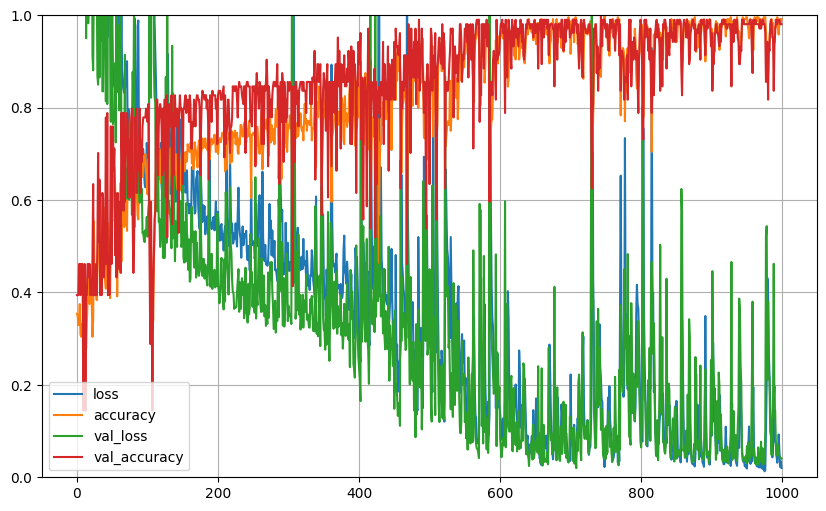

In [40]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()